**Problem statement:** Analyse the Hotel Booking Demand dataset to draw key insights

What is the question that we are trying to answer?
1. What are the identifiers of cancelled bookings?

#### Downloading data

In [1]:
!pip3 install kaggle

In [2]:
#reference: https://www.kaggle.com/general/74235
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 42.0MB/s]


In [4]:
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


### Data statistics

In [5]:
#importing libraries
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('hotel_bookings.csv')
data.shape

(119390, 32)

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#reference: https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=B44989B6DF2DFCA8ADC98CFA9BD95F26CB914454125E16A29469762513509E62E0B90B577E9C861D39533DD80D7A062E&originRegion=eu-west-1&originCreation=20211109110047
date_fields = ['reservation_status_date', 'arrival_date_year','arrival_date_month']
categorical_fields = ['hotel','is_canceled','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',
                      'deposit_type','agent','company','customer_type','reservation_status','meal']
numeric_fields = set(data.columns) - set(date_fields) - set(categorical_fields)

In [10]:
print(len(date_fields), len(categorical_fields), len(numeric_fields))

3 14 15


In [ ]:
#categorical features
data.loc[:,categorical_fields].nunique()

hotel                     2
is_canceled               2
country                 177
market_segment            8
distribution_channel      5
is_repeated_guest         2
reserved_room_type       10
assigned_room_type       12
deposit_type              3
agent                   333
company                 352
customer_type             4
reservation_status        3
meal                      5
dtype: int64

In [ ]:
data.loc[:,numeric_fields].describe()

,previous_bookings_not_canceled,arrival_date_day_of_month,total_of_special_requests,stays_in_weekend_nights,stays_in_week_nights,children,days_in_waiting_list,adults,required_car_parking_spaces,previous_cancellations,booking_changes,adr,arrival_date_week_number,lead_time,babies
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.137097,15.798241,0.571363,0.927599,2.500302,0.103890,2.321149,1.856403,0.062518,0.087118,0.221124,101.831122,27.165173,104.011416,0.007949
std,1.497437,8.780829,0.792798,0.998613,1.908286,0.398561,17.594721,0.579261,0.245291,0.844336,0.652306,50.535790,13.605138,106.863097,0.097436
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,1.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,69.290000,16.000000,18.000000,0.000000
50%,0.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.575000,28.000000,69.000000,0.000000
75%,0.000000,23.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,126.000000,38.000000,160.000000,0.000000
max,72.000000,31.000000,5.000000,19.000000,50.000000,10.000000,391.000000,55.000000,8.000000,26.000000,21.000000,5400.000000,53.000000,737.000000,10.000000


#### Checking date anamolies

In [ ]:
#date entries must contain arrivals that lie between 1st July 2015 and 31st Aug 2017
#referennce: https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=B44989B6DF2DFCA8ADC98CFA9BD95F26CB914454125E16A29469762513509E62E0B90B577E9C861D39533DD80D7A062E&originRegion=eu-west-1&originCreation=20211109110047
d = data[date_fields]
d.loc[(d['arrival_date_year']<2015) | (d['arrival_date_year']>2017)].any()

reservation_status_date    False
arrival_date_year          False
arrival_date_month         False
dtype: bool

In [ ]:
daterange = pd.date_range(start=pd.to_datetime('1 Jul 2015'), end=pd.to_datetime('31 Aug 2017'))

In [ ]:
d['arrival_period'] = d['arrival_date_month']+d['arrival_date_year'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
d.loc[~pd.to_datetime(d['arrival_period']).isin(daterange)]

,reservation_status_date,arrival_date_year,arrival_date_month,arrival_period


In [ ]:
#reservation status period
d.loc[~pd.to_datetime(d['reservation_status_date']).isin(daterange)].shape

(2743, 4)

In [ ]:
#reservation status date range
pd.to_datetime(d['reservation_status_date']).min(), pd.to_datetime(d['reservation_status_date']).max()

(Timestamp('2014-10-17 00:00:00'), Timestamp('2017-09-14 00:00:00'))

In [ ]:
data.loc[pd.to_datetime(data['reservation_status_date'])<pd.to_datetime('jul 2015'), ['is_canceled']].value_counts()

is_canceled
1              2350
dtype: int64

In [ ]:
d.loc[pd.to_datetime(d['reservation_status_date'])<pd.to_datetime('jul 2015')]

,reservation_status_date,arrival_date_year,arrival_date_month,arrival_period
8,2015-05-06,2015,July,July2015
9,2015-04-22,2015,July,July2015
10,2015-06-23,2015,July,July2015
27,2015-05-11,2015,July,July2015
32,2015-05-29,2015,July,July2015
...,...,...,...,...
75119,2015-06-30,2015,September,September2015
75120,2015-06-30,2015,September,September2015
75121,2015-06-30,2015,September,September2015
75122,2015-06-30,2015,September,September2015


All arrival dates are in the specified date range, however certain bookings and updates to those bookings have been made outside the specified date range as well

An interesting thing to observe is that certain reservation updates were made as early as 10 months early from the date of arrivals

#### checking for anomalies in numeric data

In [ ]:
(data[numeric_fields]<0).any()

previous_bookings_not_canceled    False
booking_changes                   False
previous_cancellations            False
lead_time                         False
stays_in_weekend_nights           False
days_in_waiting_list              False
stays_in_week_nights              False
required_car_parking_spaces       False
children                          False
arrival_date_day_of_month         False
babies                            False
total_of_special_requests         False
adults                            False
adr                                True
arrival_date_week_number          False
dtype: bool

In [ ]:
#average daily rate has negative values
data.loc[data['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


It is an anomaly

In [ ]:
data.loc[data['adr']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23
118762,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,NaN,NaN,0,Transient,0.0,0,3,Check-Out,2017-08-25
118963,City Hotel,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-27
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29


### As a hotel owner, the KPIs are important in understanding the performance of the hotel

__Average Daily Rate: measure of average rate paid per room that's occupied at the property. ADR is calculated to have an understanding of a hotel's profits and performance__ </br>

We shall analyse the factors that help improve adr

### Univariate analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


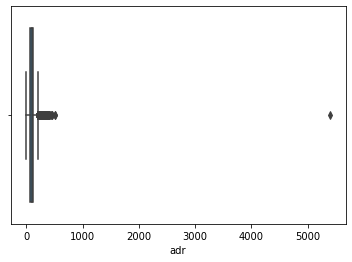

In [ ]:
fig = plt.figure()
sns.boxplot(data['adr'])
plt.show()

there are a few outliers, let us observe the outliers and try to resolve them

In [ ]:
data.loc[data.adr>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [ ]:
d_ = data.loc[(data.adr>=0)&(data.adr<2000)]
print(d_.shape)

(119388, 32)


#### 1. analysing adr against cancellation, hotel, arrival_date_month, arrival_date_year, reserved_room_type, assigned_room_type, market_segment

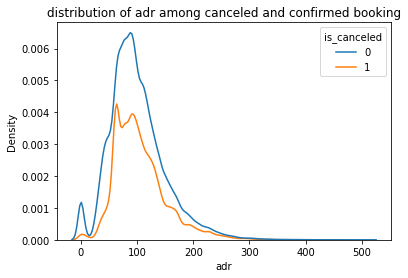

In [ ]:
#distribution of adr among cancelled and confirmed bookings
fig = plt.figure()
sns.kdeplot(d_['adr'], hue=d_['is_canceled']);
plt.title('distribution of adr among canceled and confirmed booking')
plt.show()

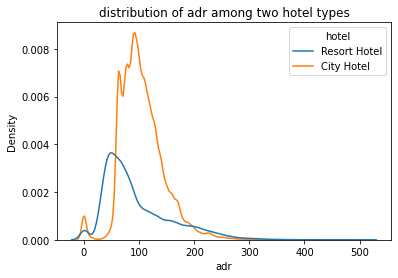

In [ ]:
#distribution of adr among city hotels and resort hotels
fig = plt.figure()
sns.kdeplot(d_['adr'], hue=d_['hotel'])
plt.title('distribution of adr among two hotel types')
plt.show()

In [ ]:
d_.groupby(by=['hotel'])['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79329.0,105.237722,39.342675,0.0,79.2,99.9,126.0,510.0
Resort Hotel,40059.0,94.955459,61.441099,0.0,50.0,75.0,125.0,508.0


In [ ]:
#is there a variation in adr based on different month of the year
t = d_.groupby(by=['arrival_date_month'])['adr'].describe()

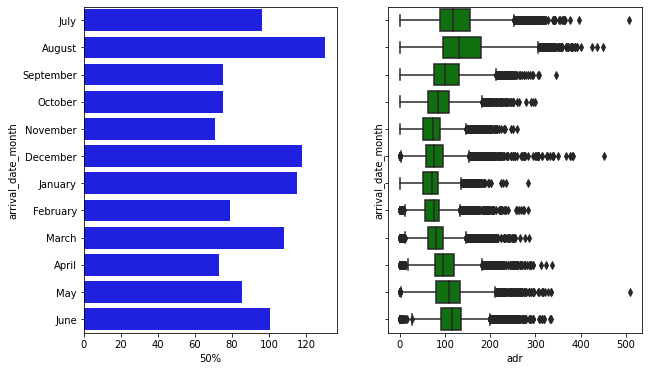

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,6))
sns.barplot(y=t.index, x=t['50%'], color='blue', ax=ax[0]);
sns.boxplot(x=d_['adr'], y=d_['arrival_date_month'], color='green', ax=ax[1]);
plt.show()

August has higher adr compared to other months

In [ ]:
t.sort_values(by=['50%','mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
August,13877.0,140.111523,61.657384,0.0,95.0000,130.50,180.0000,450.00
July,12661.0,126.788013,52.064455,0.0,90.0000,118.10,155.1000,508.00
June,10939.0,116.672192,38.773671,0.0,92.0000,115.00,135.0000,333.67
May,11791.0,108.695516,42.875641,0.0,80.1000,108.00,132.6000,510.00
September,10508.0,105.049657,43.004095,0.0,74.8975,100.30,130.0000,345.00
April,11089.0,100.380790,38.193729,0.0,77.0000,96.30,119.0000,336.00
October,11160.0,87.908879,36.281047,0.0,62.0000,85.67,109.6500,300.00
March,9792.0,80.145305,33.039649,0.0,62.0000,79.20,95.6775,285.00
December,6780.0,81.076776,42.731774,0.0,58.2750,75.00,96.0000,451.50


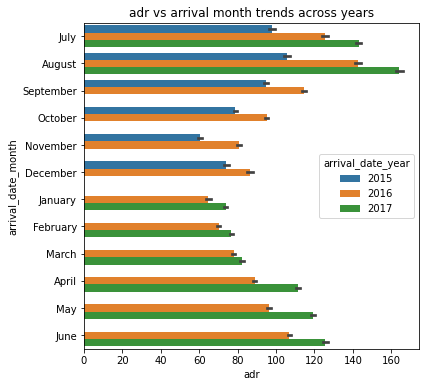

In [ ]:
#let us analyse this trend across the year to understand better
fig = plt.figure(figsize=(6,6))
sns.barplot(y=d_['arrival_date_month'], x=d_['adr'], hue=d_['arrival_date_year']);
plt.title('adr vs arrival month trends across years')
plt.show()

__adr has increased each year across all months__

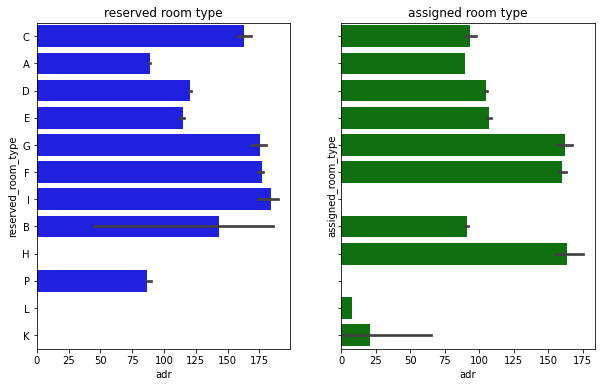

In [ ]:
#analysing adr with respect to reserved room type and analysed room type
fig,ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,6))
sns.barplot(x=d_['adr'], y=d_['reserved_room_type'], estimator=np.median, color='blue', ax=ax[0])
sns.barplot(x=d_['adr'], y=d_['assigned_room_type'], estimator=np.median, color='green', ax=ax[1])
ax[0].set_title('reserved room type')
ax[1].set_title('assigned room type')
#plt.title('analysing adr')
plt.show()

In [ ]:
#let us understand if the difference between reserved room type and assigned room type affect the adr
d_['reserve_assigned'] = (d_['reserved_room_type']==d_['assigned_room_type']).astype(int)
d_.groupby(by=['reserve_assigned'])['adr'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,mean,std,min,25%,50%,75%,max
reserve_assigned,,,,,,,,
0,14916.0,83.363412,47.805168,0.0,49.00,75.8,109.8,510.0
1,104472.0,104.418173,47.624410,0.0,72.25,96.0,127.8,451.5


if the reserve and assigned room types are same, it leads to higher adr

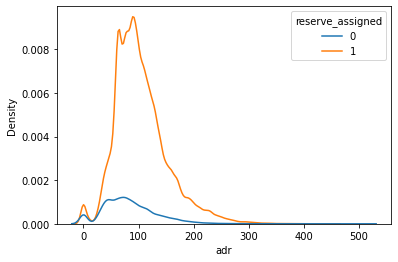

In [ ]:
fig = plt.figure()
sns.kdeplot(d_['adr'], hue=d_['reserve_assigned']);
plt.show()

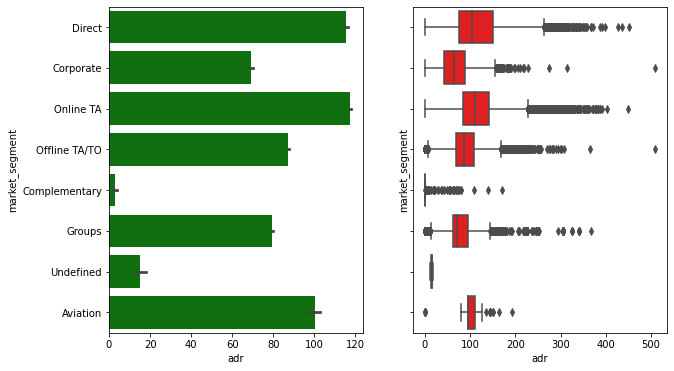

In [ ]:
#does market segment effect adr
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,6))
sns.barplot(x=d_['adr'], y=d_['market_segment'], color='green', ax=ax[0])
sns.boxplot(x=d_['adr'], y=d_['market_segment'], color='red', ax=ax[1])
plt.show()

In [ ]:
#What share of market is constituted by the Aviation, Online TA and Direct?
t1 = data.loc[data.market_segment.isin(['Aviation','Online TA','Direct'])]
print(t1.shape[0]/data.shape[0] * 100) 

58.06181422229667


In [ ]:
#what percentage of ADR is constituted by the above three?
print(t1['adr'].sum()/data['adr'].sum() * 100)

66.60823153378341


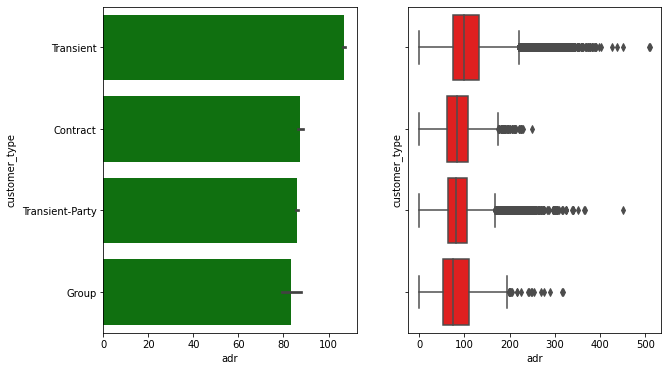

In [ ]:
#does customer type effect adr
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,6))
sns.barplot(x=d_['adr'], y=d_['customer_type'], color='green', ax=ax[0])
sns.boxplot(x=d_['adr'], y=d_['customer_type'], color='red', ax=ax[1])
plt.show()

In [ ]:
#what percentage of bookings are constituted by Transient customers?
t1 = data.loc[data.customer_type=='Transient']
print(t1.shape[0]/data.shape[0] * 100)

75.05905017170618


In [ ]:
#what percentage of ADR is contributed by the Transient customers?
print(t1['adr'].sum() / data['adr'].sum() * 100)

66.60823153378341


#### 2. analysing numerical features against adr
days_in_waiting_list, booking_changes, total_of_special_request, 

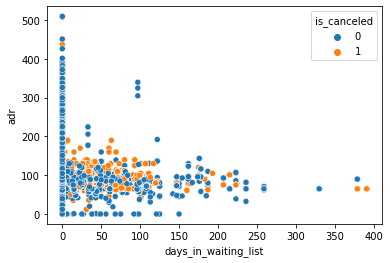

In [ ]:
#analysing days_in_waiting_list
fig = plt.figure()
sns.scatterplot(x=d_['days_in_waiting_list'], y=d_['adr'], hue=d_['is_canceled']);
plt.show()

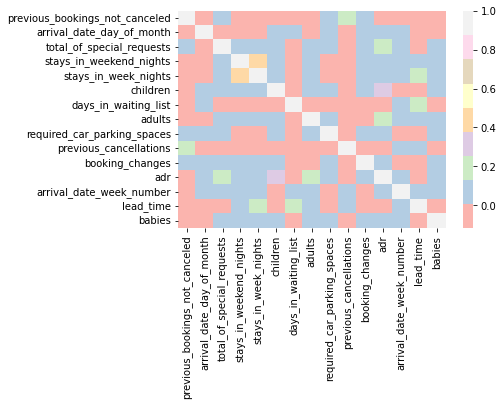

In [ ]:
corr = d_.loc[:,numeric_fields].corr()
sns.heatmap(corr, cmap=plt.get_cmap('Pastel1'))

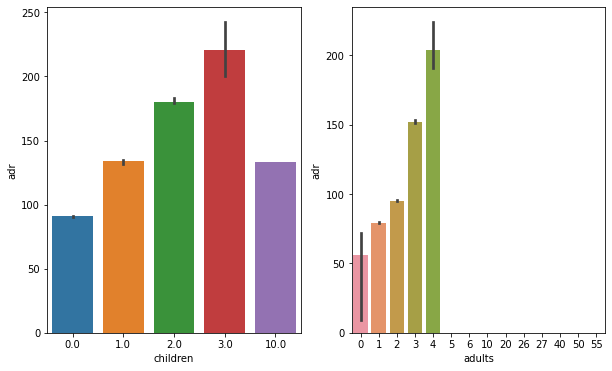

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.barplot(x='children', y='adr', data=d_, estimator=np.median, ax=ax[0])
sns.barplot(x='adults', y='adr', data=d_, estimator=np.median, ax=ax[1])
plt.show()

### Regression on ADR

Let us understand the feature importances by linear regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [12]:
from scipy.sparse import csr_matrix, hstack

In [80]:
date_fields

['reservation_status_date', 'arrival_date_year', 'arrival_date_month']

In [87]:
Y = data['adr']
X = data.drop(['adr'], axis=1, inplace=False)
X.drop(date_fields, axis=1, inplace=True)
X['arrival_date_month'] = data['arrival_date_month']
print(X.shape, Y.shape)

(119390, 29) (119390,)


In [88]:
pd.isna(X).any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True
days_in_waiting_list              False
customer_type                     False


In [91]:
cat_fields = categorical_fields
cat_fields.append('arrival_date_month')

In [92]:
#filling missing values: we know from the data preparation that missing values are left on purpose
X['children'] = X['children'].fillna(value=0)
X['agent'] = X['agent'].fillna(value=0)
X['company'] = X['company'].fillna(value=0)
pd.isna(X).any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False
customer_type                     False


In [93]:
X.fillna(value='NA', inplace=True)

In [95]:
#encoding categorical data
ohe = OneHotEncoder()
X_cat = ohe.fit_transform(X.loc[:,cat_fields])
print(X_cat.shape)

(119390, 933)


In [96]:
X.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'arrival_date_month'],
      dtype='object')

In [97]:
X.drop(cat_fields, axis=1, inplace=True)
X_csr = csr_matrix(X)
X_ = hstack([X_csr, X_cat])
print(X_.shape)

(119390, 947)


In [98]:
cat_fields

['hotel',
 'is_canceled',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status',
 'meal',
 'arrival_date_month']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.2)
print(X_train.shape, X_test.shape)

(95512, 947) (23878, 947)


In [100]:
reg = LinearRegression(fit_intercept=True)

In [101]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
reg.score(X_train, y_train)

0.5684588569275

In [103]:
reg.score(X_test, y_test)

0.6387306357055014

In [104]:
feature_names = np.append(X.columns, ohe.get_feature_names())
print(len(feature_names))

947


In [105]:
feature_imp = pd.DataFrame({'feature': feature_names, 'coef':reg.coef_})
print(feature_imp.shape)

(947, 2)


In [106]:
feature_imp.sort_values(by=['coef'], ascending=False).head(15)

,feature,coef
937,x14_December,230.757406
944,x14_November,187.115524
739,x10_279.0,159.407784
945,x14_October,156.670506
946,x14_September,131.667599
936,x14_August,104.149685
632,x10_102.0,96.807226
849,x10_422.0,94.235557
423,x9_254.0,90.658759
511,x9_404.0,86.147947


In [107]:
#important_fields = [categorical_fields[int(i.split('_')[0].replace('x',''))] for i in feature_imp['feature'].values]
def find_actual_field(field_name):
  try:
    i = field_name.split('_',1)[0].replace('x','')
    field = categorical_fields[int(i)]
  except:
    field = field_name
  return field

In [108]:
feature_imp['feature_category'] = feature_imp.feature.apply(find_actual_field)

In [109]:
feature_imp.sort_values(by=['coef'], ascending=False).head(15)

,feature,coef,feature_category
937,x14_December,230.757406,arrival_date_month
944,x14_November,187.115524,arrival_date_month
739,x10_279.0,159.407784,company
945,x14_October,156.670506,arrival_date_month
946,x14_September,131.667599,arrival_date_month
936,x14_August,104.149685,arrival_date_month
632,x10_102.0,96.807226,company
849,x10_422.0,94.235557,company
423,x9_254.0,90.658759,agent
511,x9_404.0,86.147947,agent


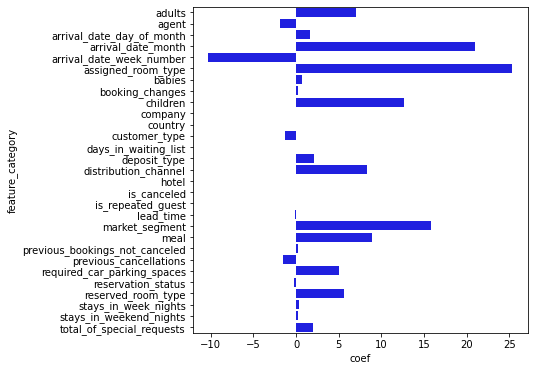

In [110]:
t = feature_imp.groupby(by=['feature_category']).median()
fig = plt.figure(figsize=(6,6))
sns.barplot(x='coef', y=t.index, data=t, color='blue');
plt.show()

In [70]:
feature_imp.loc[feature_imp['feature_category'].isin(['arrival_date_month','market_segment','customer_type'])]

,feature,coef,feature_category
196,x3_Aviation,7.188105,market_segment
197,x3_Complementary,-78.137130,market_segment
198,x3_Corporate,17.834528,market_segment
199,x3_Direct,24.954118,market_segment
200,x3_Groups,9.040604,market_segment
201,x3_Offline TA/TO,8.703321,market_segment
202,x3_Online TA,25.439119,market_segment
203,x3_Undefined,-15.022664,market_segment
923,x11_Contract,-2.085693,customer_type
924,x11_Group,-7.456024,customer_type
